### Principal Component Analysis

In [1]:
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('usarrests.csv', index_col=0)
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [4]:
df.mean()

Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64

In [5]:
df.var()

X = pd.DataFrame(scale(df), index=df.index, columns=df.columns)

pca_loadings = pd.DataFrame(PCA().fit(X).components_.T, index=df.columns, columns=['V1', 'V2', 'V3', 'V4'])
print(pca_loadings)

                V1        V2        V3        V4
Murder    0.535899  0.418181 -0.341233  0.649228
Assault   0.583184  0.187986 -0.268148 -0.743407
UrbanPop  0.278191 -0.872806 -0.378016  0.133878
Rape      0.543432 -0.167319  0.817778  0.089024


In [6]:
pca = PCA()
df_plot = pd.DataFrame(pca.fit_transform(X), columns=['PC1','PC2','PC3','PC4'], index=X.index)
print('\n', df_plot.head())


                  PC1       PC2       PC3       PC4
Alabama     0.985566  1.133392 -0.444269  0.156267
Alaska      1.950138  1.073213  2.040003 -0.438583
Arizona     1.763164 -0.745957  0.054781 -0.834653
Arkansas   -0.141420  1.119797  0.114574 -0.182811
California  2.523980 -1.542934  0.598557 -0.341996


Text(0, 0.5, 'Second Principal Component')

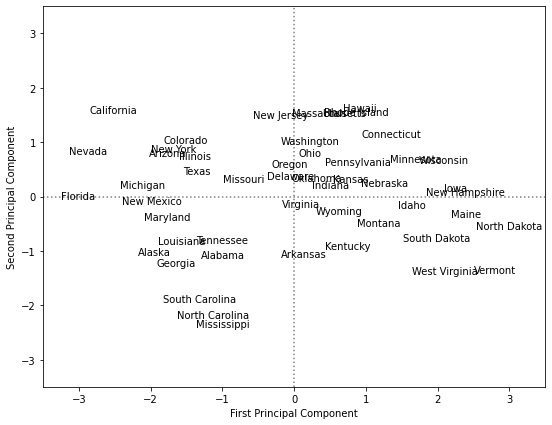

In [7]:
fig, ax1 = plt.subplots(figsize=(9,7))
ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)

for i in df_plot.index:
    ax1.annotate(i, (-df_plot.PC1.loc[i],-df_plot.PC2.loc[i]), ha='center')

ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.vlines(0,-3.5,3.5, linestyles='dotted', colors='grey')

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')

In [8]:
ax2=ax1.twinx().twiny()

ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.set_xlabel('Principal Component loading vectors', color='red')

a=1.07
for i in pca_loadings[['V1','V2']].index:
    ax2.annotate(i, (-pca_loadings.V1.loc[i]*a,-pca_loadings.V2.loc[i]*a), color='red')

ax2.arrow(0,0,-pca_loadings.V1[0],-pca_loadings.V2[0])
ax2.arrow(0,0,-pca_loadings.V1[1],-pca_loadings.V2[1])
ax2.arrow(0,0,-pca_loadings.V1[2],-pca_loadings.V2[2])
ax2.arrow(0,0,-pca_loadings.V1[3],-pca_loadings.V2[3])


Explained variance:  [2.53085875 1.00996444 0.36383998 0.17696948]

Explained variance ratio:  [0.62006039 0.24744129 0.0891408  0.04335752]


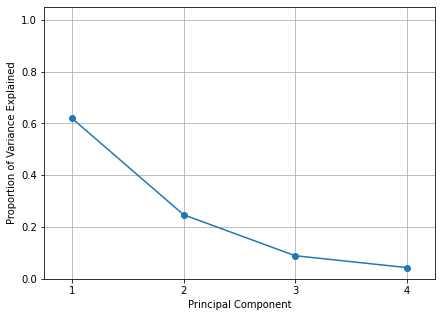

In [9]:
print('\nExplained variance: ', pca.explained_variance_)
print('\nExplained variance ratio: ', pca.explained_variance_ratio_)

plt.figure(figsize=(7,5))
plt.plot([1,2,3,4], pca.explained_variance_ratio_,'-o')
plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4])
plt.grid()

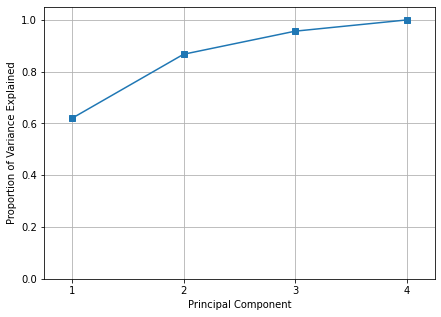

In [10]:
plt.figure(figsize=(7,5))
plt.plot([1,2,3,4], np.cumsum(pca.explained_variance_ratio_),'-s')
plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4])
plt.grid()

In [11]:
df2 = pd.read_csv('nci60.csv').drop('Unnamed: 0', axis=1)
df2.columns = np.arange(df2.columns.size)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Columns: 6830 entries, 0 to 6829
dtypes: float64(6830)
memory usage: 3.3 MB


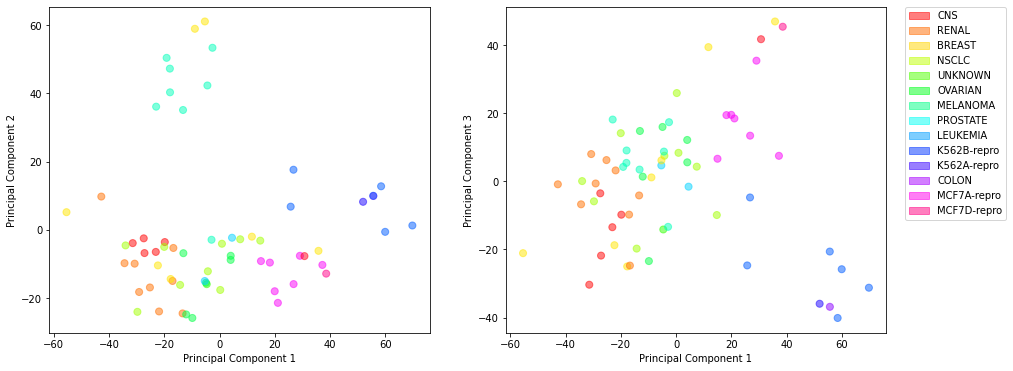

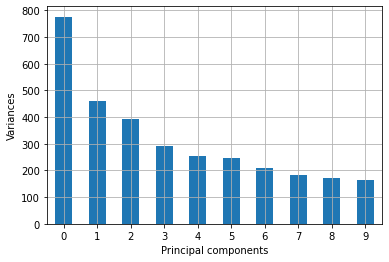

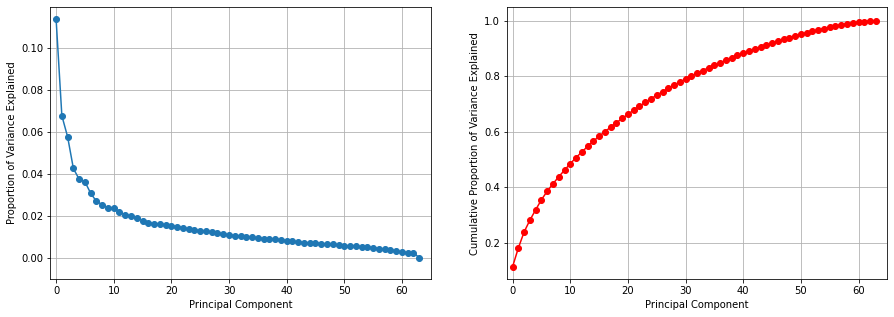

In [12]:
y = pd.read_csv('NCI60_y.csv', usecols=[1], skiprows=1, names=['type'])

X = pd.DataFrame(scale(df2))
X.shape

pca2 = PCA()
df2_plot = pd.DataFrame(pca2.fit_transform(X))

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))

color_idx = pd.factorize(y.type)[0]
cmap = matplotlib.cm.hsv

ax1.scatter(df2_plot.iloc[:,0], df2_plot.iloc[:,1], c=color_idx, cmap=cmap, alpha=0.5, s=50)
ax1.set_ylabel('Principal Component 2')

ax2.scatter(df2_plot.iloc[:,0], df2_plot.iloc[:,2], c=color_idx, cmap=cmap, alpha=0.5, s=50)
ax2.set_ylabel('Principal Component 3')

handles = []
labels = pd.factorize(y.type.unique())
norm = matplotlib.colors.Normalize(vmin=0.0, vmax=14.0)
for i, v in zip(labels[0], labels[1]):
    handles.append(matplotlib.patches.Patch(color=cmap(norm(i)), label=v, alpha=0.5))

ax2.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


for ax in fig.axes:
    ax.set_xlabel('Principal Component 1')

df_pom = df2_plot.iloc[:,:5].std(axis=0, ddof=0)

pd.DataFrame([df_pom.to_numpy(), pca2.explained_variance_ratio_[:5],
              np.cumsum(pca2.explained_variance_ratio_[:5])],
    index=['Standard Deviation', 'Proportion of Variance', 'Cumulative Proportion'],
    columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

plt.figure()
df2_plot.iloc[:,:10].var(axis=0, ddof=0).plot(kind='bar', rot=0)
plt.ylabel('Variances')
plt.xlabel('Principal components')
plt.grid()

fig, (ax1,ax2)=plt.subplots(1,2, figsize=(15,5))

ax1.plot(pca2.explained_variance_ratio_,'-o')
ax1.set_ylabel('Proportion of Variance Explained')
ax1.set_ylim(ymin=-0.01)
ax1.grid()

ax2.plot(np.cumsum(pca2.explained_variance_ratio_),'-ro')
ax2.set_ylabel('Cumulative Proportion of Variance Explained')
ax2.set_ylim(ymax=1.05)
ax2.grid()
for ax in fig.axes:
    ax.set_xlabel('Principal Component')
    ax.set_xlim(-1,65)

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split

wine = datasets.load_wine()
X = wine.data
y = wine.target

np.where(X == float('Inf'), float('NaN'), X)
X = X[~np.isnan(X).any(axis=1)]
X_std = scale(X)

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3)

In [14]:
covariance_matrix = np.cov(X_std.T)

In [15]:
eig_vals, eig_vects = np.linalg.eig(covariance_matrix)

In [16]:
correlation_matrix = np.corrcoef(X_std.T)

In [17]:
u, s, v = np.linalg.svd(X_std.T)

In [18]:
for i in eig_vects.T:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(i))


In [19]:
eigenvalvec = [(np.abs(eig_vals[i]), eig_vects[:, i]) for i in range(len(eig_vals))]
eigenvalvec.sort(key=lambda x: x[0], reverse=True)
print('Eigenvalues sorted in descending order:')
for i in eigenvalvec:
    print(i[0])

Eigenvalues sorted in descending order:
4.732436977583594
2.511080929645123
1.454241867846468
0.9241658668248749
0.858048676537112
0.6452822124678541
0.5541414662457842
0.3504662749462548
0.290512032693977
0.2523200103608245
0.2270642817308852
0.16972373898012177
0.10396199182075339


In [20]:
total = sum(eig_vals)
variance_expl = [(i / total)*100 for i in sorted(eig_vals, reverse=True)]
cumulative_variance_expl = np.cumsum(variance_expl)

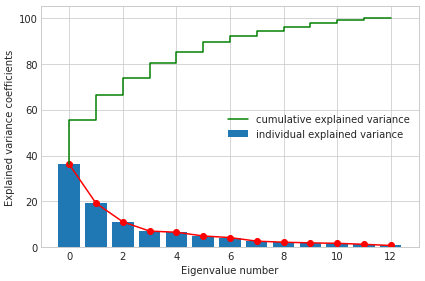

In [21]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure()
    plt.bar(range(13), variance_expl, label='individual explained variance')
    plt.plot(variance_expl, 'o-r')
    plt.step(range(13), cumulative_variance_expl, 'g', label='cumulative explained variance')
    plt.ylabel('Explained variance coefficients')
    plt.xlabel('Eigenvalue number')
    plt.legend(loc='best')
    plt.tight_layout()

plt.show()

In [22]:
for k, eig in enumerate(cumulative_variance_expl):
    if eig >= 95:
        print('The', k, 'biggest eigenvectors contains', round(eig, 2), '% of information')
        print('so the', len(cumulative_variance_expl)-k, 'components left are omittable.')
        break

The 9 biggest eigenvectors contains 96.17 % of information
so the 4 components left are omittable.
